### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
raw=pd.read_csv('data/nhanes_2015_2016.csv')
raw.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
raw.shape

(5735, 28)

In [4]:
raw.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

### Check data types

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [6]:
raw.dtypes

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

### Check null values

In [7]:
raw.isnull().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2     261
DMDMARTL     261
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

### Frequency table
[DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)

In [8]:
raw.DMDEDUC2.value_counts()
#Note that the value_counts method excludes missing values

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [9]:
pd.isnull(raw.DMDEDUC2).sum()

261

### `replace`

In [10]:
raw['DMDEDUC2x']=raw.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 
                                      4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
raw.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [11]:
raw.DMDEDUC2x.value_counts(normalize=True)

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

[RIAGENDR - Gender](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)

In [12]:
raw['RIAGENDRx']=raw.RIAGENDR.replace({1: 'Male', 2: 'Female'})

In [13]:
raw.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

### Fill missing values

In [14]:
raw['DMDEDUC2x']=raw.DMDEDUC2x.fillna(value='missing')

In [15]:
raw.DMDEDUC2x.value_counts(normalize=True)

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

### Numerical summeries
[BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)

In [16]:
raw.BMXWT.describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

### Graphical summaries

C:\Users\HP-NPC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXWT', ylabel='Density'>

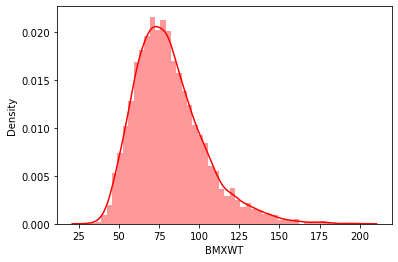

In [17]:
sns.distplot(a=raw.BMXWT.dropna(), color='r')

<AxesSubplot:>

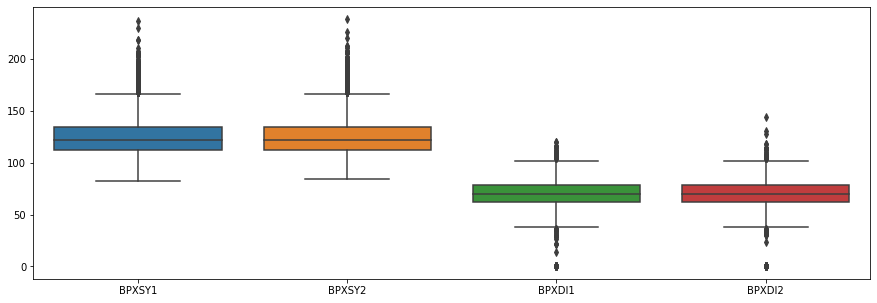

In [18]:
bp=raw.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]]
plt.figure(figsize=(15,5))
sns.boxplot(data=bp)

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY1'>

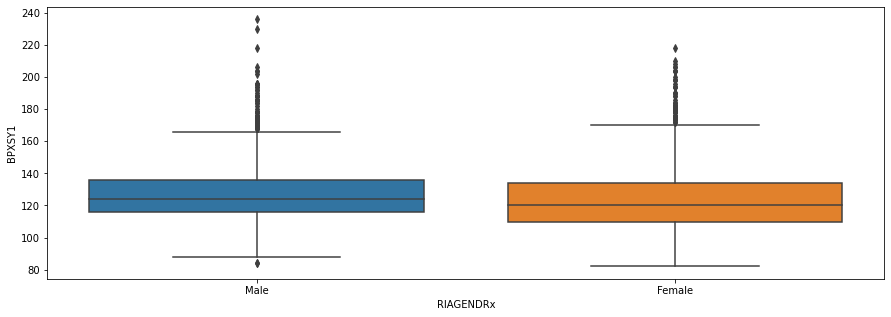

In [19]:
bp=raw.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]]
plt.figure(figsize=(15,5))
sns.boxplot(x=raw.RIAGENDRx,y="BPXSY1",data=raw)

### [RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)

In [20]:
raw.RIDAGEYR.min()

18

In [21]:
raw.RIDAGEYR.max()

80

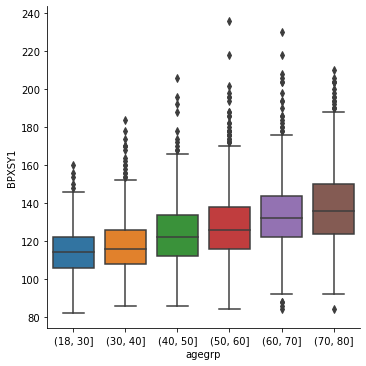

In [22]:
raw['agegrp']=pd.cut(x=raw.RIDAGEYR, bins=[18,30,40,50,60,70,80])
#plt.figure(figsize=(15,5))
sns.catplot(x='agegrp', y='BPXSY1', data=raw, kind='box')

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

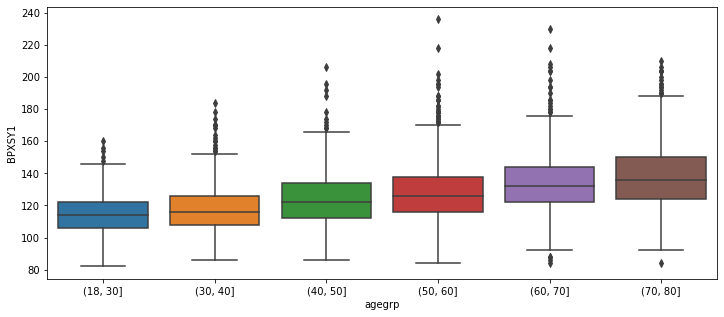

In [23]:
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp', y='BPXSY1', data=raw)

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

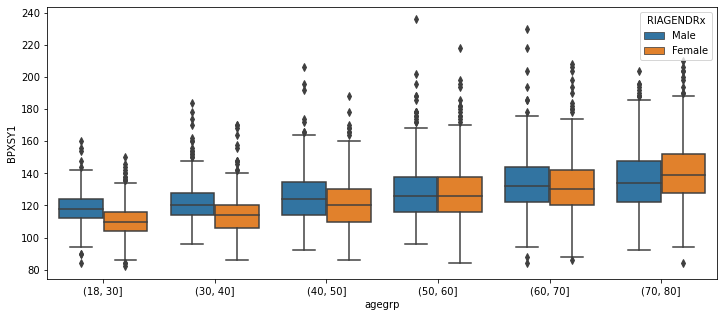

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp', y='BPXSY1', hue='RIAGENDRx', data=raw)

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY1'>

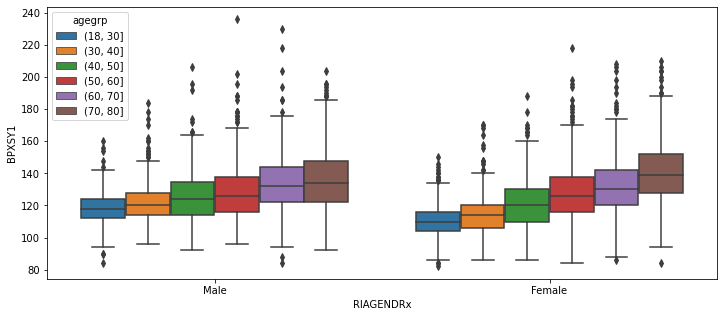

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(x='RIAGENDRx', y='BPXSY1', hue='agegrp', data=raw)

In [26]:
raw.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

## Analysis of multivariate data - NHANES case study

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

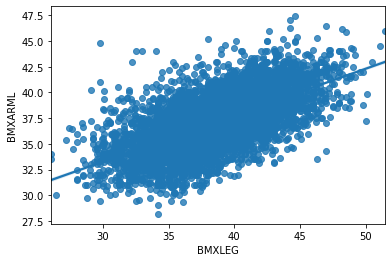

In [27]:
sns.regplot(x='BMXLEG', y='BMXARML', data=raw)

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

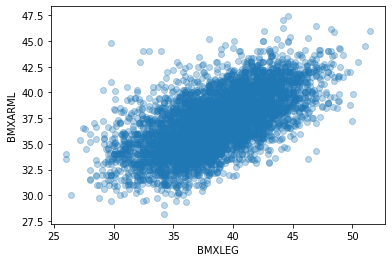

In [28]:
sns.regplot(x='BMXLEG', y='BMXARML', data=raw, fit_reg=False, 
           scatter_kws={'alpha':0.3})